<h1 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;"><b>Chronic Kidney Disorder Using Machine Learning </b></h1>
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNj6FcM7cbqzSLiEeW3gj2i8K8pr0WZOnCWQ&s" width="300" height="300"></center>

<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;"> 1. Importing the packages </h3>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;"> 2. Loading the dataset </h3> 

In [17]:
chronic_data=pd.read_csv("chronic_kidney.csv")

#### Checking top 5 rows of the dataset

In [76]:
chronic_data.head()

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Blood_Urea,Serum_Creatinine,Sodium,Pottasium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Class
0,80,1.020,1,0,1,36,1.2,137.53,4.63,15.4,7800,5.20,1,1
1,50,1.020,4,0,1,18,0.8,137.53,4.63,11.3,6000,4.71,0,1
2,80,1.010,2,3,1,53,1.8,137.53,4.63,9.6,7500,4.71,0,1
3,70,1.005,4,0,1,56,3.8,111.00,2.50,11.2,6700,3.90,1,1
4,80,1.010,2,0,1,26,1.4,137.53,4.63,11.6,7300,4.60,0,1


#### Checking the shape of the dataset

In [7]:
chronic_data.shape

(400, 14)

#### Viewing the datatypes of the dataset

In [8]:
chronic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


#### Viewing the statistics of the data

In [19]:
chronic_data.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;"> 3. Data Preprocessing </h3> 

### 1. Data Cleaning

#### a. Checking the null values

In [20]:
chronic_data.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

> Since there are no null values we can proceed further.

#### b. Renaming the columns

In [24]:
chronic_data.rename(columns = {'Bp':'Blood_Pressure','Sg':'Specific_Gravity','Al':'Albumin','Su':'Sugar','Rbc':'Red_Blood_Cell','Bu':'Blood_Urea','Sc':'Serum_Creatinine','Sod':'Sodium','Pot':'Pottasium','Hemo':'Hemoglobin','Wbcc':'White_Blood_Cell_Count','Rbcc':'Red_Blood_Cell_Count','Htn':'Hypertension'}, inplace = True)

In [25]:
chronic_data

,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cell,Blood_Urea,Serum_Creatinine,Sodium,Pottasium,Hemoglobin,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


#### c. Changing the datatype of the columns

In [27]:
chronic_data = chronic_data.astype({"Blood_Pressure": 'int', "Albumin": 'int','Sugar':'int','Red_Blood_Cell':'int','Blood_Urea':'int','White_Blood_Cell_Count':'int','Hypertension':'int'})

In [29]:
chronic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Blood_Pressure          400 non-null    int32  
 1   Specific_Gravity        400 non-null    float64
 2   Albumin                 400 non-null    int32  
 3   Sugar                   400 non-null    int32  
 4   Red_Blood_Cell          400 non-null    int32  
 5   Blood_Urea              400 non-null    int32  
 6   Serum_Creatinine        400 non-null    float64
 7   Sodium                  400 non-null    float64
 8   Pottasium               400 non-null    float64
 9   Hemoglobin              400 non-null    float64
 10  White_Blood_Cell_Count  400 non-null    int32  
 11  Red_Blood_Cell_Count    400 non-null    float64
 12  Hypertension            400 non-null    int32  
 13  Class                   400 non-null    int64  
dtypes: float64(6), int32(7), int64(1)
memory u

<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;"> 4. Splitting of Dataset </h3>  

In [30]:
X = chronic_data.drop(columns=['Class'],axis=1)
Y = chronic_data['Class']

In [31]:
print(X.head())

   Blood_Pressure  Specific_Gravity  Albumin  Sugar  Red_Blood_Cell  \
0              80             1.020        1      0               1   
1              50             1.020        4      0               1   
2              80             1.010        2      3               1   
3              70             1.005        4      0               1   
4              80             1.010        2      0               1   

   Blood_Urea  Serum_Creatinine  Sodium  Pottasium  Hemoglobin  \
0          36               1.2  137.53       4.63        15.4   
1          18               0.8  137.53       4.63        11.3   
2          53               1.8  137.53       4.63         9.6   
3          56               3.8  111.00       2.50        11.2   
4          26               1.4  137.53       4.63        11.6   

   White_Blood_Cell_Count  Red_Blood_Cell_Count  Hypertension  
0                    7800                  5.20             1  
1                    6000                  4.71 

In [32]:
print(Y.head())

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


In [33]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.1,random_state=0)

In [34]:
print(X_test.head())

     Blood_Pressure  Specific_Gravity  Albumin  Sugar  Red_Blood_Cell  \
286              70             1.020        0      0               1   
392              80             1.020        0      0               1   
75               76             1.015        1      0               1   
194              70             1.010        2      0               1   
297              60             1.025        0      0               1   

     Blood_Urea  Serum_Creatinine  Sodium  Pottasium  Hemoglobin  \
286          18               0.8  145.00       5.00       14.70   
392          48               1.2  147.00       4.30       14.80   
75           16               0.7  138.00       3.20        8.10   
194          49               1.2  137.53       4.63       12.53   
297          26               1.0  146.00       4.90       15.80   

     White_Blood_Cell_Count  Red_Blood_Cell_Count  Hypertension  
286                    9800                  6.00             0  
392                 

In [35]:
print(Y_train.head())

60     1
100    1
22     1
82     1
37     1
Name: Class, dtype: int64


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;"> 5. Building of Machine Learning Models </h3>  

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
pipe_log_reg=Pipeline([("log_reg_classifier",LogisticRegression(random_state=42))])

pipe_ada=Pipeline([("ada_classifier",AdaBoostClassifier(n_estimators=100, random_state=0))])

pipe_dt=Pipeline([("dt_classifier", DecisionTreeClassifier(random_state=0))])

pipe_gau_nb=Pipeline([("gau_nb_classifier",GaussianNB())])

pipe_rf=Pipeline([("rf_classifier",RandomForestClassifier(max_leaf_nodes=30,n_estimators=25))])

In [63]:
pipelines=[pipe_log_reg,pipe_ada,pipe_dt,pipe_gau_nb,pipe_rf]
model_names=["Logistic Regression","ADA Boost Classifier","DecisionTree Classifier","GaussianNB","RandomForestClassifier"]

In [64]:
for pipe in pipelines:
    pipe.fit(X_train, Y_train)

In [65]:
score=[]
def model_eval(model_name):
    i=0
    global score
    for pipe in pipelines:
        print(f"Model: {model_name[i]}\n")
        pred = pipe.predict(X_test)

        accuracy = accuracy_score(Y_test, pred)
        classification_rep = classification_report(Y_test, pred)
        conf_matrix = confusion_matrix(Y_test, pred)
        score.append(accuracy)

        print(f"Accuracy of {model_name[i]}")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nConfusion Matrix:\n", conf_matrix)
        print("\nClassification Report:\n", classification_rep)
        print("------------------------------------------------------")
        i+=1

<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;">   6. Model Evaluation </h3>

In [66]:
 model_eval(model_names)

Model: Logistic Regression

Accuracy of Logistic Regression
Accuracy: 1.0000

Confusion Matrix:
 [[15  0]
 [ 0 25]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

------------------------------------------------------
Model: ADA Boost Classifier

Accuracy of ADA Boost Classifier
Accuracy: 1.0000

Confusion Matrix:
 [[15  0]
 [ 0 25]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

-------

In [67]:
score

[1.0, 1.0, 0.95, 0.95, 1.0]

In [68]:
max(score)

1.0

<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;">   7. Model Comparision</h3>

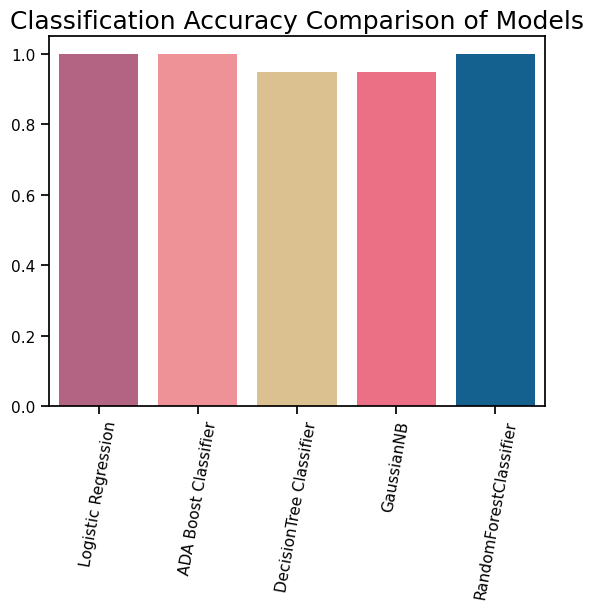

In [69]:
sns.set(context='notebook', style=None)
ax = sns.barplot(x=model_names, y=score, palette=['#C05780','#FF828B','#E7C582','#FF5C77','#0065A2'])
ax.set_title('Classification Accuracy Comparison of Models', fontsize=18)
for item in ax.get_xticklabels():
    item.set_rotation(80)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;">   8. Model Prediction </h3>

In [70]:
model=AdaBoostClassifier(n_estimators=100, random_state=0)

In [71]:
model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [73]:
#making a predictive system
input_data=(80,1.020,1,0,1,36,1.2,137.53,4.63,15.4,7800.0,5.20,1)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesn\'t suffer chronic kidney.")
else:
    print("The person suffers chronic kidney.")

[1]
The person suffers chronic kidney.


In [75]:
#making a predictive system
input_data=(70,1.025,0,0,1,31,1.2,141.0,3.5,16.5,7800,6.2,0)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("The person doesn\'t suffer chronic kidney.")
else:
    print("The person suffers chronic kidney.")

[0]
The person doesn't suffer chronic kidney.


<h3 style="text-align: center; background-color: skyblue; color: maroon; padding: 20px; border-radius: 5px;">   THANK YOU  </h3>